HOG image plotting related function here. We run it with a small example for some testing:

## Now try with Gabor filters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
root_folder = os.getcwd()
print(root_folder)
image_path = os.path.join(root_folder, 'images-data-trial')
image_file_list = os.listdir(image_path)

c:\Users\u0135479\Documents\GitHub\directionality


Plotting bandwidth: 5


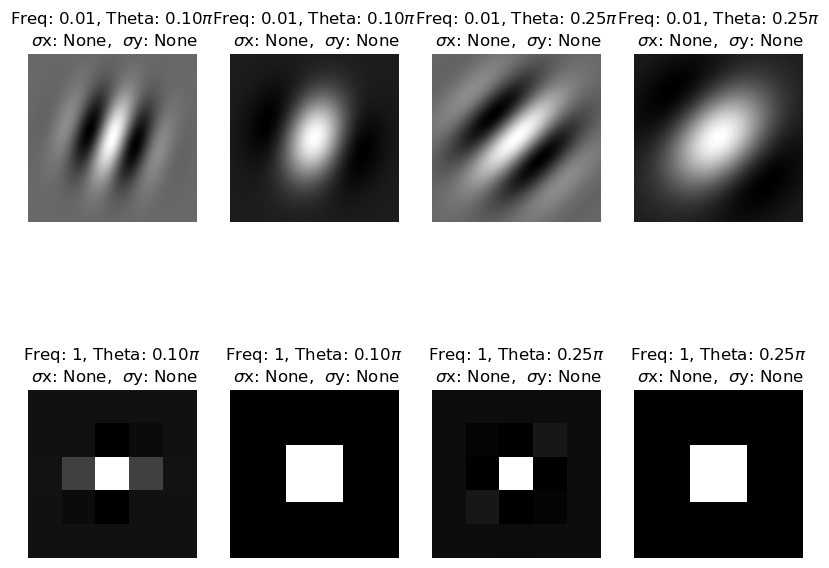

In [2]:
# from skimage import color, io
from skimage.filters import gabor_kernel
from skimage.filters import gabor

def exploratory_plot_gabor_filters(frequencies, thetas, sigma_xs, sigma_ys, bandwidths=[1]):
    fig, axes = plt.subplots(len(frequencies) * len(sigma_xs), len(thetas) * len(sigma_ys) *len(bandwidths),
                             figsize=(5*len(frequencies)*len(sigma_xs), 4*len(thetas) * len(sigma_ys)))

    for i, freq in enumerate(frequencies):
        for j, theta in enumerate(thetas):
            for k, sigma_x in enumerate(sigma_xs):
                for l, sigma_y in enumerate(sigma_ys):
                    for f, bandwidth in enumerate(bandwidths):
                        # Calculate index for subplotting
                        row = i * len(sigma_xs) + k
                        col = j * len(sigma_ys)*len(bandwidths) + l*len(bandwidths) + f

                        # Generate Gabor kernel
                        kernel = gabor_kernel(freq, theta=theta,
                                            sigma_x=sigma_x, sigma_y=sigma_y,
                                            bandwidth=bandwidth,
                                            )

                        # Plotting the real part of the kernel
                        ax = axes[row, col]
                        ax.imshow(np.real(kernel), cmap='gray')
                        ax.axis('off')
                        # if offsets != [0]:
                        #     ax.set_title(f'Freq: {freq}, Theta: {theta/np.pi:.2f}$\pi$\n $\sigma$x: {sigma_x},  $\sigma$y: {sigma_y}, \noffset: {offset}')
                        # else:
                        ax.set_title(f'Freq: {freq}, Theta: {theta/np.pi:.2f}$\pi$\n $\sigma$x: {sigma_x},  $\sigma$y: {sigma_y}')
    print(f'Plotting bandwidth: {bandwidth}')
    # plt.tight_layout()
    plt.show()

# Define your parameters
frequencies = [0.01, 1]
thetas = [np.pi / 10, np.pi / 4]
sigma_xs = [None]
sigma_ys = [None]
# offsets= [0]
bandwidths = [1, 5]

exploratory_plot_gabor_filters(frequencies, thetas, sigma_xs, sigma_ys, bandwidths)


### Some plotting here for exploratory and debugging purposes

Current bandwidth = 10.


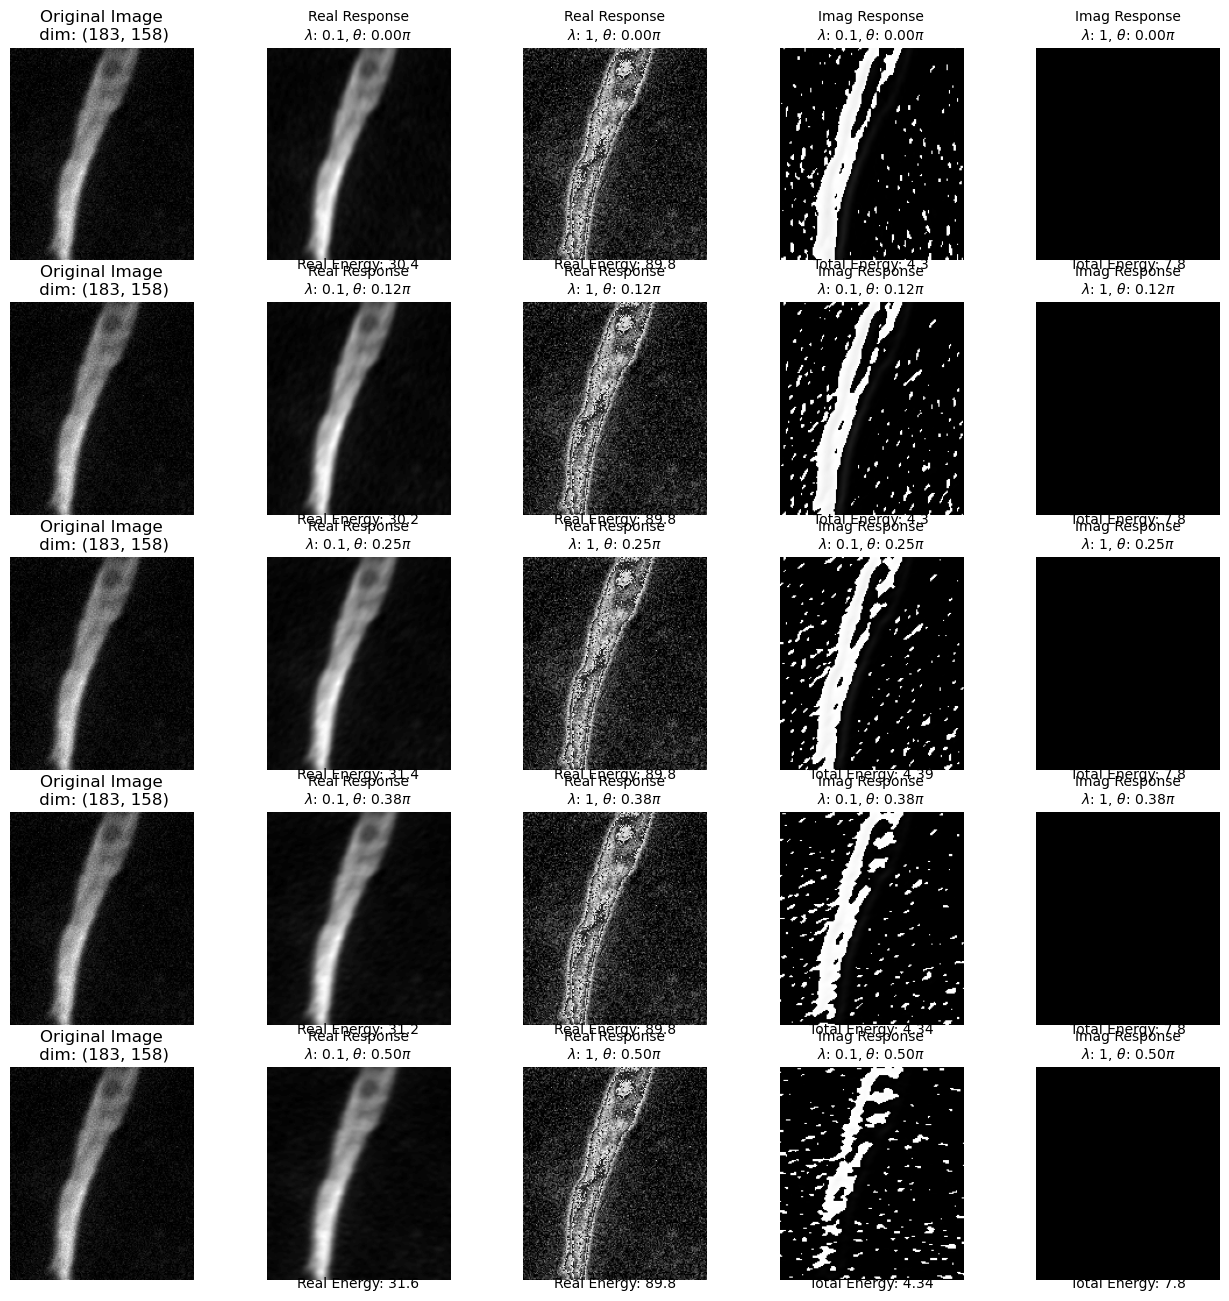

The image took 0.1 seconds to run with bandwidth = 10.
Current bandwidth = 100.


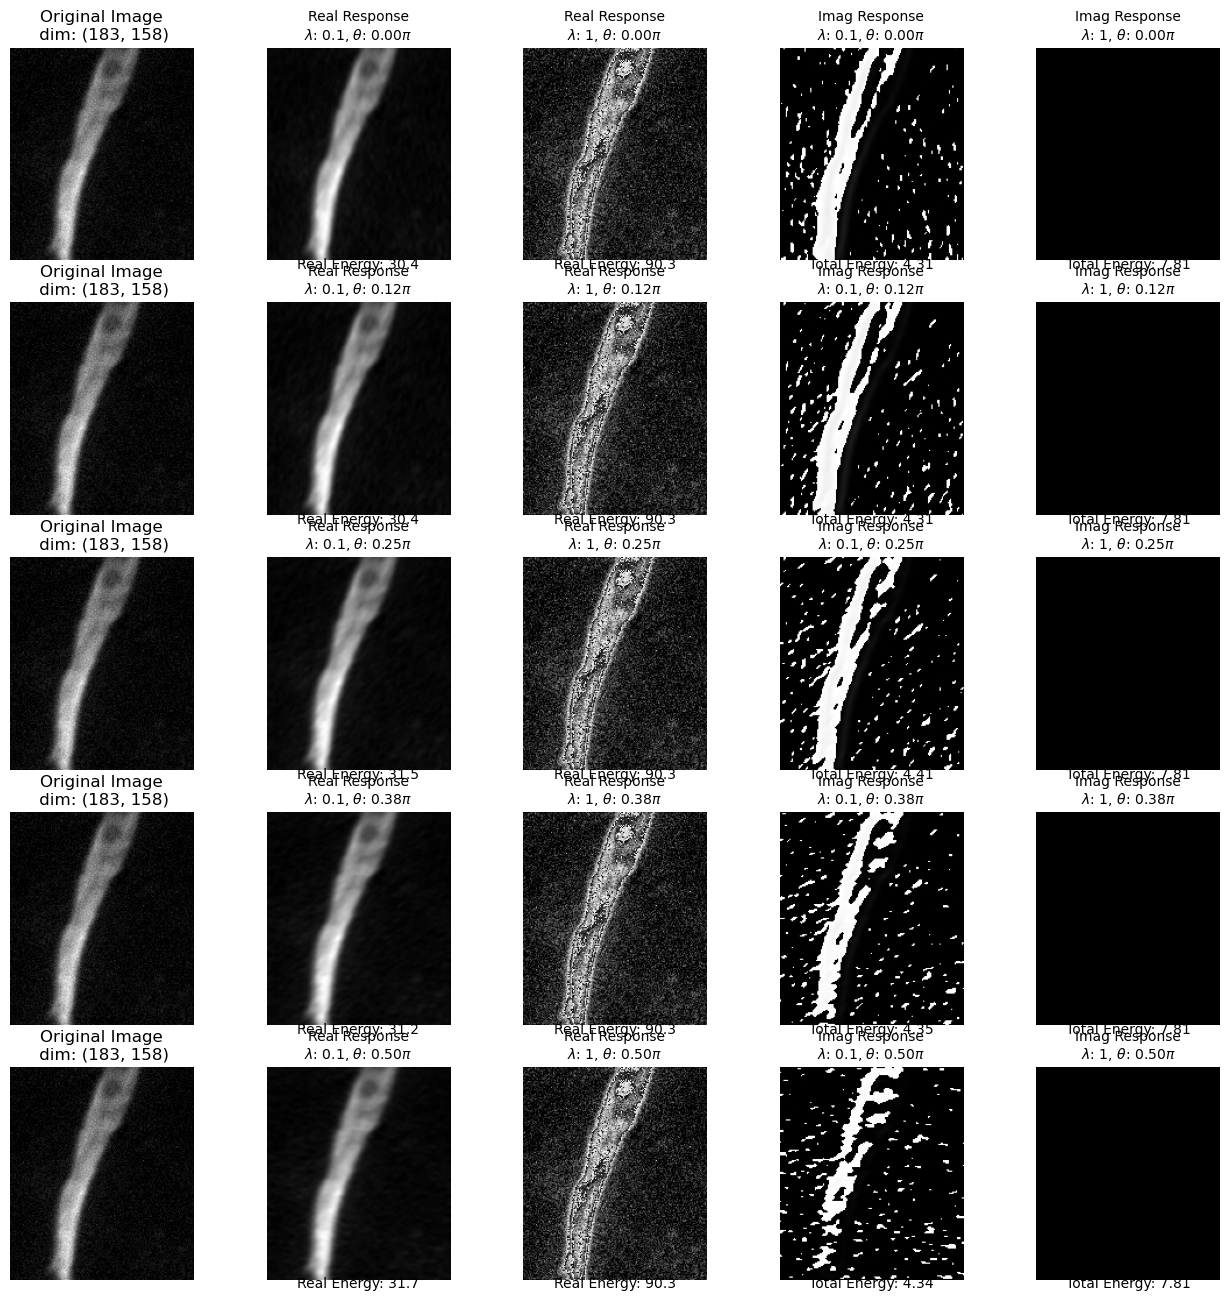

The image took 0.1 seconds to run with bandwidth = 100.
Current bandwidth = 10.


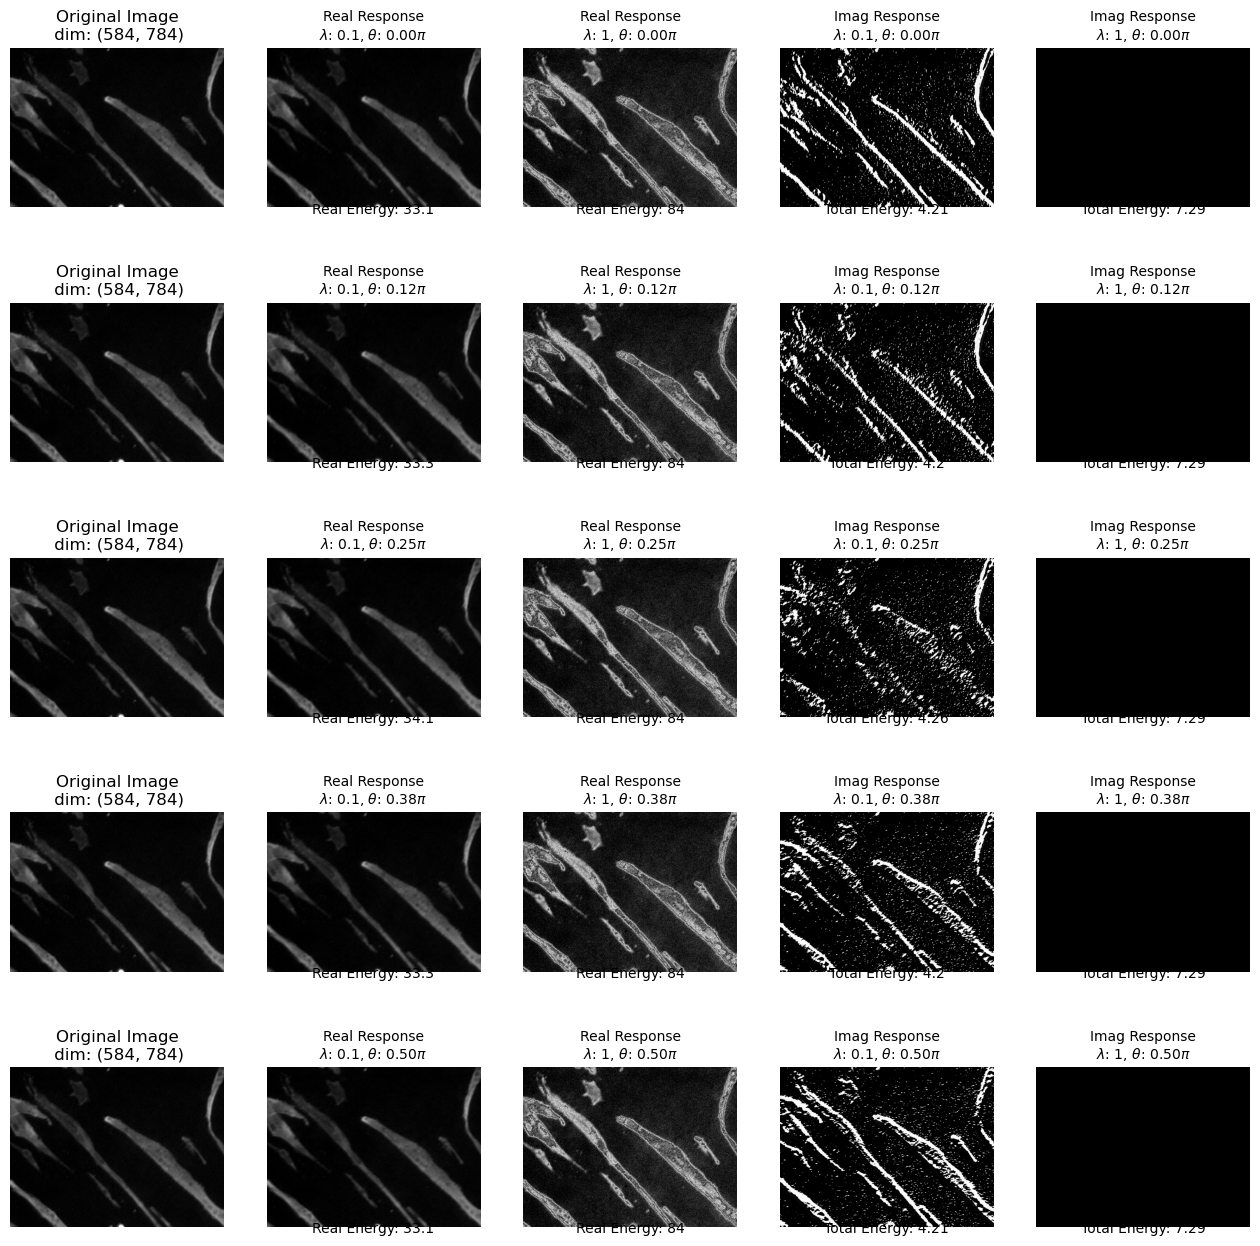

The image took 0.8 seconds to run with bandwidth = 10.
Current bandwidth = 100.


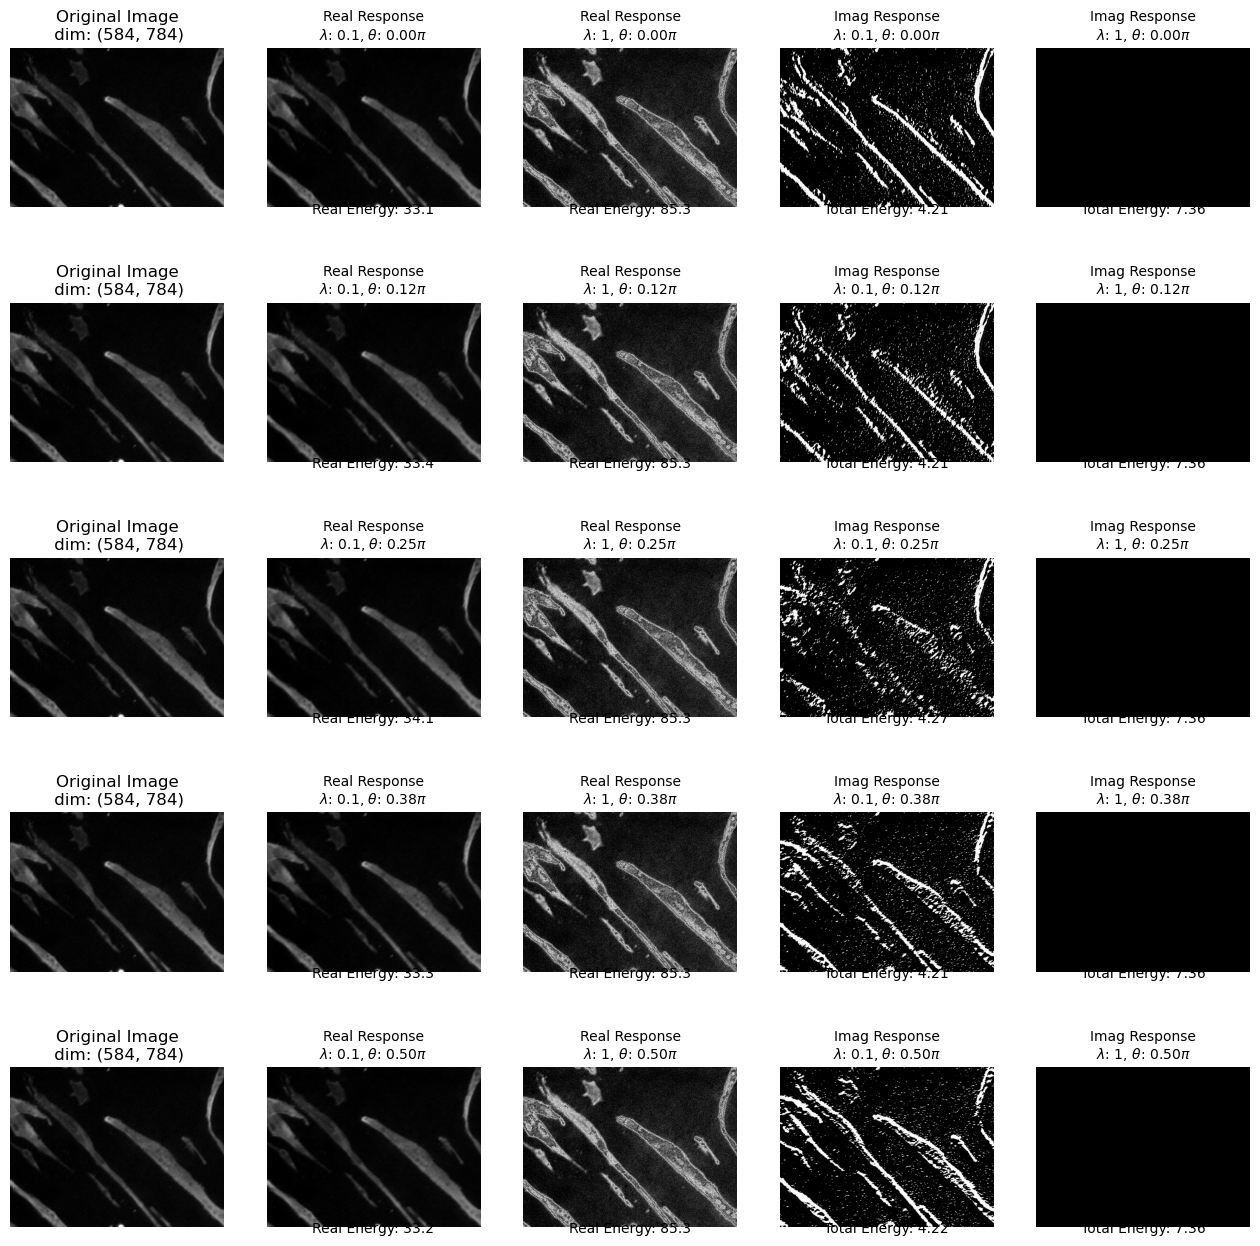

The image took 0.8 seconds to run with bandwidth = 100.
original size: (1460, 1936, 3)
new size: (730, 968, 3)
Current bandwidth = 10.


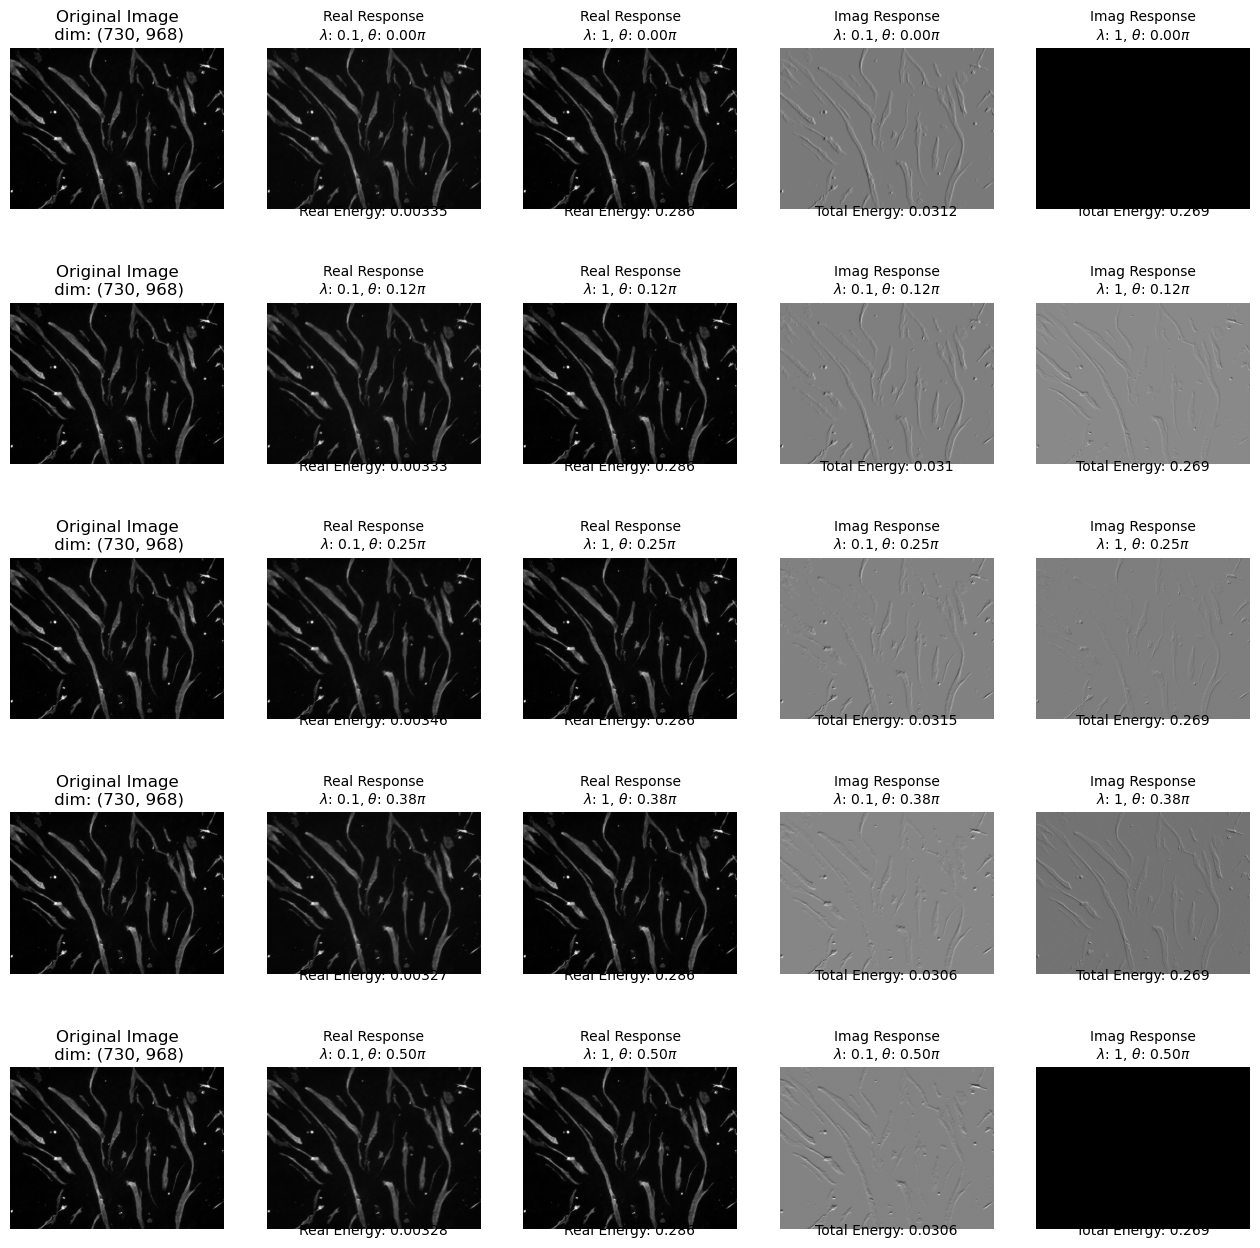

The image took 1.3 seconds to run with bandwidth = 10.
Current bandwidth = 100.


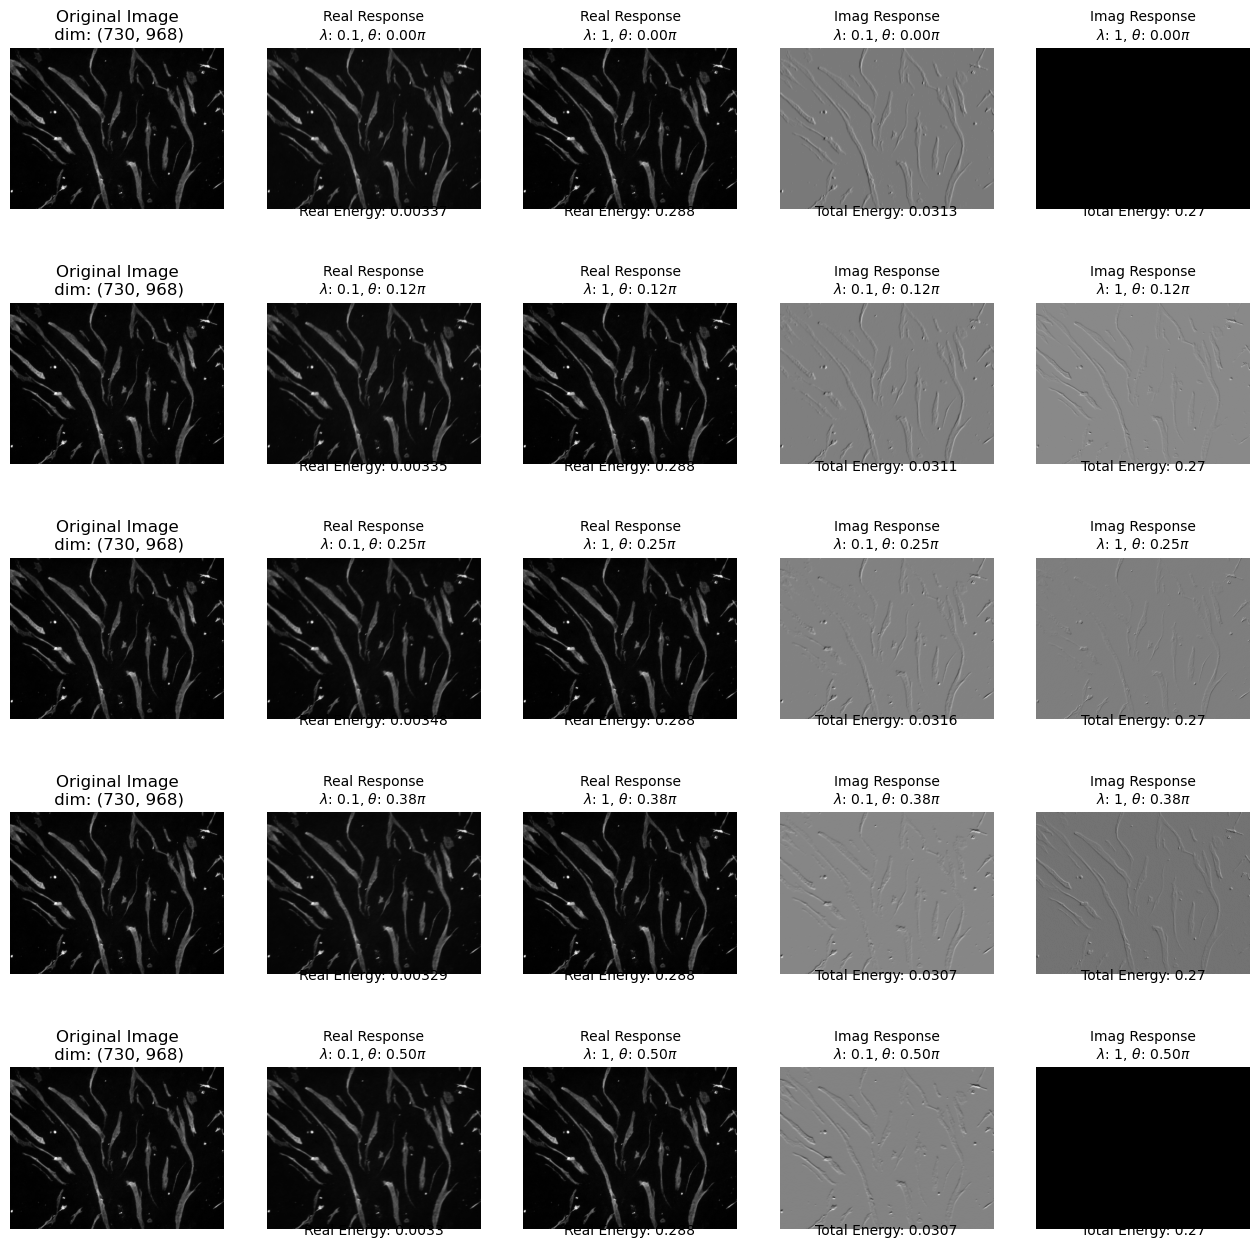

The image took 1.3 seconds to run with bandwidth = 100.
original size: (1460, 1936, 3)
new size: (730, 968, 3)
Current bandwidth = 10.


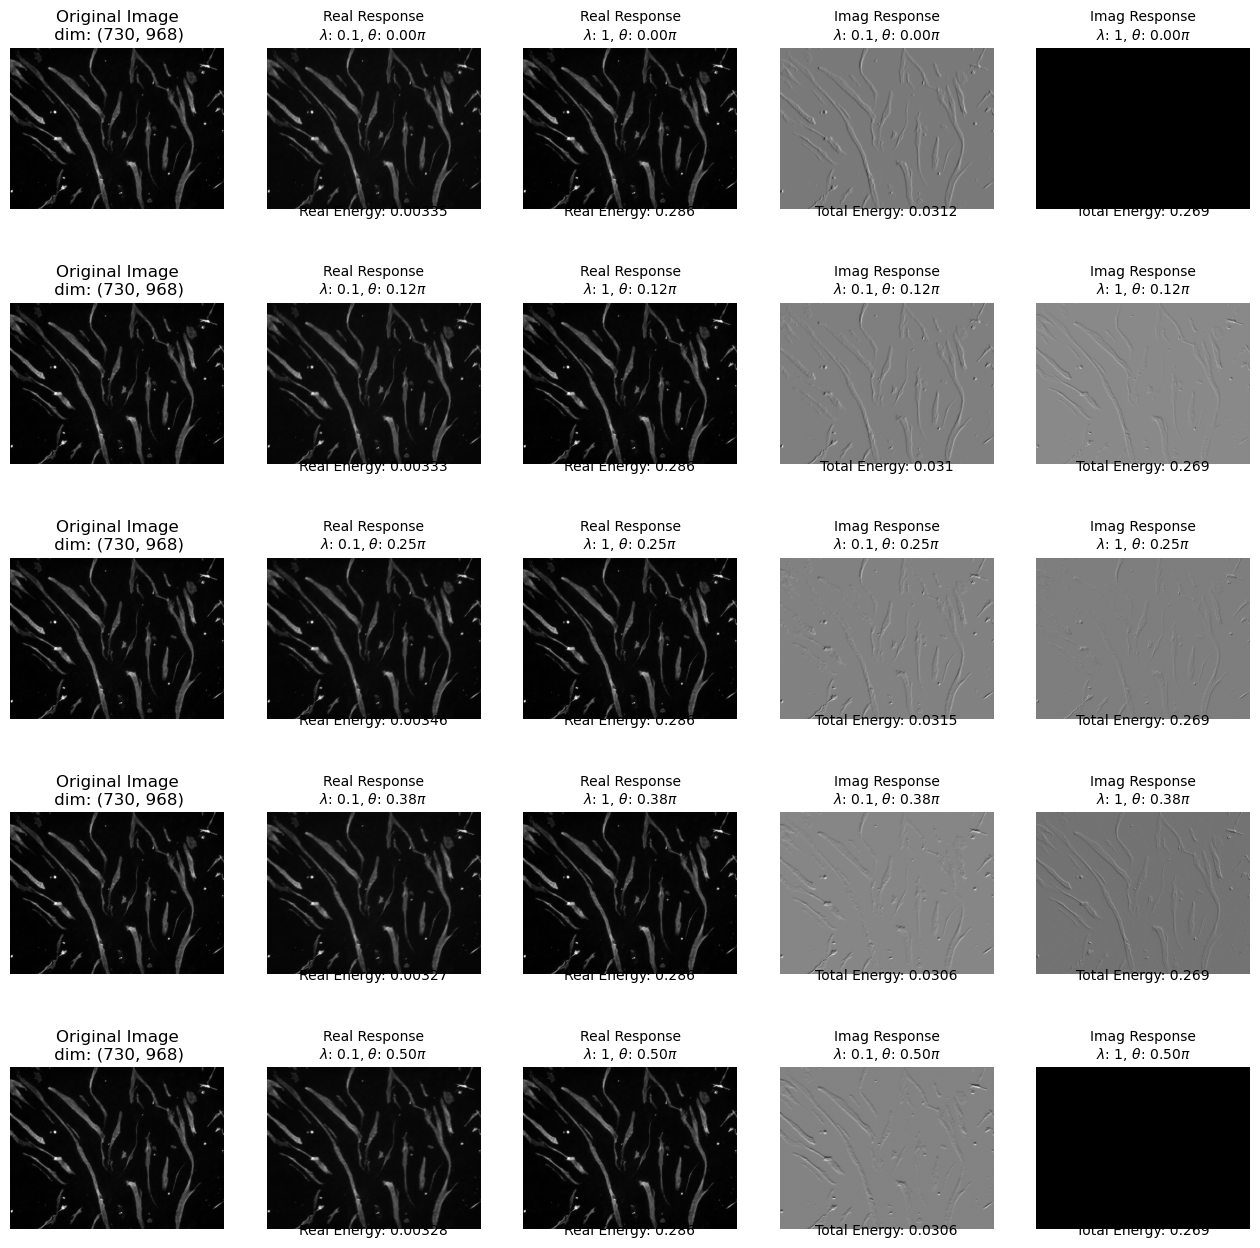

The image took 1.3 seconds to run with bandwidth = 10.
Current bandwidth = 100.


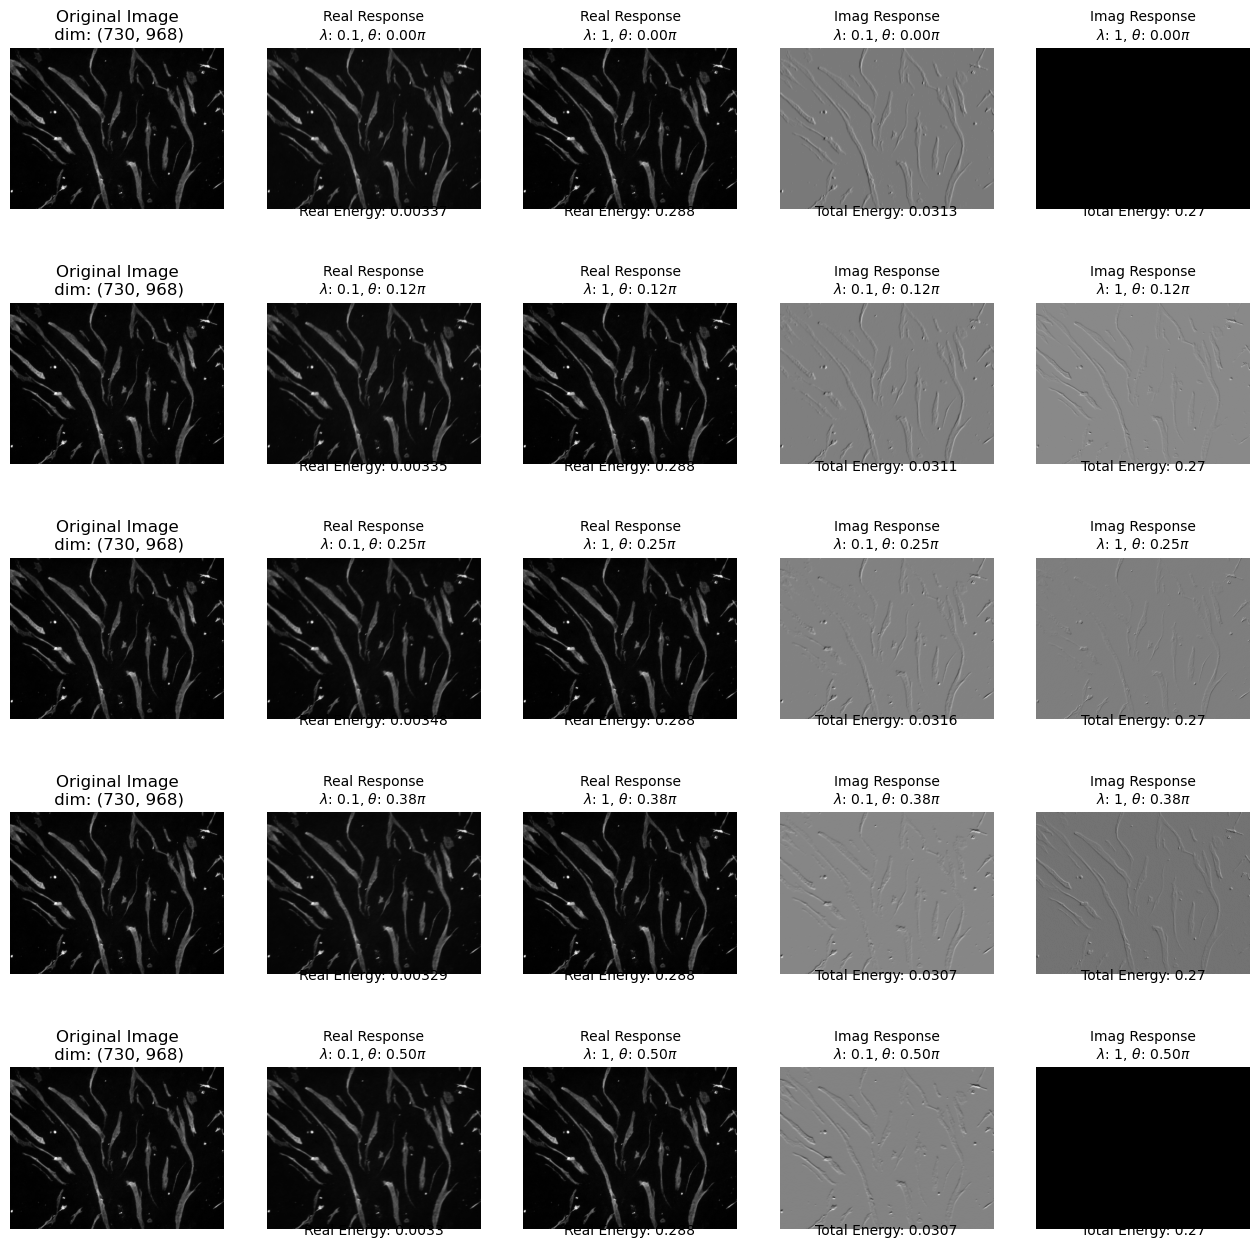

The image took 1.3 seconds to run with bandwidth = 100.


In [4]:
from skimage import transform

image_file_list = os.listdir(image_path)
origin_plot = True
n_thetas_to_plot = 5
bandwidths = [10, 100]

from pipeline_utils import load_and_prepare_image

for image_file in image_file_list[2:]:

    image = load_and_prepare_image(image_path, image_file)

    while image.shape[0]*image.shape[1] > 1200*900: # rescale big images until small enough:
        print('original size:', image.shape)
        image = transform.rescale(image, 0.5, anti_aliasing=True,
                                channel_axis=-1, mode='reflect', anti_aliasing_sigma=None)
        print('new size:', image.shape)

    image = image[:,:,1] if image.shape[2] > 1 else image #take green channel only

    thetas = np.linspace(0, np.pi/2, n_thetas_to_plot, endpoint=True)
    frequencies = [0.1, 1]

    n_rows = len(thetas)
    n_freqs = len(frequencies)
    n_cols = 2*n_freqs + (1 if origin_plot else 0)

    stats_to_store = ['real', 'imaginary', 'energy']
    gabor_responses = pd.DataFrame([], columns=stats_to_store)

    for bandwidth in bandwidths:

        print(f"Current bandwidth = {bandwidth}.")
        fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 16))
        if origin_plot:
            for i in range(len(thetas)):
                axs[i, 0].imshow(image, cmap='gray')
                axs[i, 0].set_title(f'Original Image\n dim: {image.shape}')
                axs[i, 0].axis('off')

        t0 = time.time()

        for i, theta in enumerate(thetas):
            for j, frequency in enumerate(frequencies):

                    real, imagin = gabor(image, frequency=frequency,
                                        theta=theta,
                                        bandwidth=bandwidth)
                    energy = np.sqrt(real**2 + imagin**2)

                    real_energy = np.mean(real**2)
                    imagin_energy = np.mean(imagin**2)
                    tot_energy = np.mean(energy)

                    response = pd.DataFrame([[real, imagin, energy]], columns=stats_to_store)

                    pd.concat([gabor_responses, response], axis=0)
                    # Plotting the response

                    axis_l = axs[i, j+int(origin_plot)]
                    axs[i, j+int(origin_plot)].imshow(real, cmap='gray')  # Assuming gabor() returns an image

                    title_text_realpart = 'Real Response\n' + rf'$\lambda$: {frequency:.2g}, $\theta$: {theta/np.pi:.2f}$\pi$'
                    axs[i, j+int(origin_plot)].set_title(title_text_realpart, fontsize=10)
                    axs[i, j+int(origin_plot)].axis('off')
                    axs[i, j+int(origin_plot)].text(0.5, -0.04, f'Real Energy: {real_energy:.3g}',
                                                    transform=axis_l.transAxes, ha='center', fontsize=10)

                    axis_r = axs[i, n_freqs+j+int(origin_plot)]

                    title_text_imagpart = 'Imag Response\n' + rf'$\lambda$: {frequency:.2g}, $\theta$: {theta/np.pi:.2f}$\pi$'
                    axs[i, n_freqs+j+int(origin_plot)].imshow(imagin, cmap='gray')  # Assuming gabor() returns an image
                    axs[i, n_freqs+j+int(origin_plot)].set_title(title_text_imagpart, fontsize=10)
                    axs[i, n_freqs+j+int(origin_plot)].axis('off')
                    axs[i, n_freqs+j+int(origin_plot)].text(0.5, -0.04, f'Total Energy: {tot_energy:.3g}',
                                                            transform=axis_r.transAxes, ha='center', fontsize=10)

        # plt.tight_layout()
        t1 = time.time()
        plt.show()
        print(f"The image took {t1-t0:.1f} seconds to run with bandwidth = {bandwidth}.")
        print("="*45)


# Now try with larger images

In [21]:
from skimage import transform
from skimage.filters import gabor
import datetime
image_file_list = os.listdir(image_path)
origin_plot = True
n_thetas_to_plot = 30

from pipeline_utils import load_and_prepare_image

for image_file in image_file_list[:2]:

    image = load_and_prepare_image(image_path, image_file)
    image = image[:,:,1] if image.shape[2] > 1 else image #take green channel only
    image = image.astype(np.float32)
    print('loaded:', image_file)
    print('original size:', image.shape)
    t1 = datetime.datetime.now()

    # while image.shape[0]*image.shape[1] > 1200*800: # rescale big images to something smaller to gain time (for now)
    #     image = transform.rescale(image, 0.5, anti_aliasing=True, channel_axis=-1, mode='reflect', anti_aliasing_sigma=None)
    #     print('new size:', image.shape[0]*image.shape[1])


    thetas = np.linspace(0, 2*np.pi, n_thetas_to_plot, endpoint=False)

    frequencies = [0.03, 0.1, 0.3, 1, 3]

    stats_to_store = ['image file', 'section', 'angle (deg)', 'frequency', 'tot_energy', 'real', 'imaginary', 'energy']
    stats_to_store = ['image file', 'section', 'angle (deg)', 'frequency', 'tot_energy']
    gabor_responses = []

    part_index = 0

    sub_figs = [image.shape[0]//1200+1, image.shape[1]//900+1] # split fig to subfigs with max size 1200*900

    widths = np.linspace(0, image.shape[0], num=sub_figs[0]+1, endpoint=True)
    widths = np.rint(widths).astype(int).tolist() #[0, ...., image_w] (M_0+1 entries)

    heights = np.linspace(0, image.shape[1], num=sub_figs[1]+1, endpoint=True)
    heights = np.rint(heights).astype(int).tolist() #[0, ...., image_h] (M_1+1 entries)

    for i in range(len(heights)-1):
        for j in range(len(widths)-1):
            part_index += 1  # Increment to track n parts
            print('Treating image part n*:', part_index)
            sub_image = image[widths[i]:widths[i+1], heights[j]:heights[j+1]]

            for theta in thetas:
                for frequency in frequencies:
                    real, imagin = gabor(sub_image, frequency=frequency, theta=theta)
                    # energy = (real + imagin)**2
                    # real_energy = np.sum(real**2)
                    tot_energy = np.sum(real**2 + imagin**2)

                    # response = [image_file, part_index, theta*180/np.pi, frequency, real, imagin, energy, tot_energy]
                    response = [image_file, part_index, theta*180/np.pi, frequency, tot_energy]

                    # gabor_responses = pd.concat([gabor_responses, response], axis=0)
                    gabor_responses.append(response)

     # finished loops with gabor filters ( image boxes grid, angle theta, frequency)
    t2 = datetime.datetime.now()
    elapsed_seconds = int((t2 - t1).total_seconds())
    mins = elapsed_seconds // 60
    secs = elapsed_seconds % 60
    elapsed_time_formatted = f"{mins}:{secs:02d}"
    print(f"Elapsed time for {image_file} (mm:ss): {mins}:{secs:02d}")

gabor_responses_df = pd.DataFrame(gabor_responses, columns=stats_to_store)
gabor_responses_df.to_csv("Response_data.csv", index=False)

KeyboardInterrupt: 

1

## After generating the data, analyse it here:

In [ ]:
gabor_responses_df = pd.read_csv("Response_data.csv", index_col=[0])
# given image and angle, take average over frequencies and image part ( can be 1, 4, or more parts)
gabor_stats = gabor_responses_df.groupby(['image file', 'angle (deg)'])['tot_energy'].mean().reset_index().rename(columns={'tot_energy': 'avg_tot_energy',
                                                                                                                           'angle (deg)': 'theta'})
gabor_stats.to_csv("Response_energy", index=False)

In [ ]:
image_file_list_run = gabor_stats['image file'].unique()

for image_file in image_file_list_run:

    # Filter data for the current image
    df = gabor_stats[gabor_stats['image file'] == image_file]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=None)
    ax2 = plt.subplot(1, 2, 2, projection='polar')

    image = load_and_prepare_image(image_path, image_file, downsample_factor=2)
    ax1.imshow(image)
    ax1.axis('off')

    theta_radians = np.deg2rad(df['theta'])

    # Create polar plot
    ax2.bar(theta_radians, df['avg_tot_energy'], width=2*np.pi/len(theta_radians), bottom=0)
    ax2.set_title(f'Polar Histogram for {image_file}', va='bottom')
    ax2.set_theta_zero_location('E')  # Set 0 degrees to point to the right ( gabor filter X axis)
    plt.tight_layout()
    plt.show()
